In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
combined = pd.read_csv('datasets/combined.csv')
combined.head()

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Current Credit Balance,Maximum Open Credit,Term,Years in current job,Home Ownership,Purpose,Number of Credit Problems,Bankruptcies,Tax Liens
0,1,445412.0,709.0,1167493.0,5214.74,17.2,6.0,228190.0,416746.0,Short Term,8 years,Home Mortgage,Home Improvements,>= 1,>= 1,0
1,1,347666.0,721.0,806949.0,8741.90,12.0,9.0,256329.0,386958.0,Long Term,3 years,Own Home,Debt Consolidation,0,0,0
2,1,217646.0,730.0,1184194.0,10855.08,19.6,13.0,122170.0,272052.0,Short Term,< 1 year,Home Mortgage,Debt Consolidation,>= 1,>= 1,0
3,1,548746.0,678.0,2559110.0,18660.28,22.6,4.0,437171.0,555038.0,Short Term,2 years,Rent,Debt Consolidation,0,0,0
4,1,215952.0,739.0,1454735.0,39277.75,13.9,20.0,669560.0,1021460.0,Short Term,< 1 year,Rent,Debt Consolidation,0,0,0


### Random Forest Classifier
Random Forest is a supervised machine learning algorithm that we used in order to classify both our numerical and categorical variables in order to rank the predictors of Loan Status

We first trained and tested our data on the default Random Forest Classifier model and checked its accuracy:

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

response = pd.read_csv("datasets/combined.csv",usecols = ['Loan Status'])
num = ['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt', 'Years of Credit History', 'Number of Open Accounts', 'Current Credit Balance', 'Maximum Open Credit']
cate = ['Term', 'Years in current job', 'Home Ownership', 'Purpose', 'Number of Credit Problems', 'Bankruptcies', 'Tax Liens']

#One-hot Encoding categorical variables
ohe = OneHotEncoder(sparse=False)
ohe_data = ohe.fit_transform(combined[cate])
feature_names = ohe.get_feature_names_out(cate)
ohe_df = pd.DataFrame(ohe_data, columns=feature_names)
predics = pd.concat([combined[num], ohe_df], axis=1)

#splitting dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(predics,response,test_size = 0.25, random_state = 42)

# import random forest and fit the data 
rf = RandomForestClassifier(random_state=42,n_jobs=-1, bootstrap=False)
rf.fit(X_train, y_train)

# use the current model and the test set of predictors to predict the response 
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class problems
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class problems
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class problems

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print()
print(classification_report(y_test, y_pred))

Accuracy: 0.7648877318581191
F1 Score: 0.6901717981065559
Precision: 0.6962436672633427
Recall: 0.7648877318581191

              precision    recall  f1-score   support

           0       0.43      0.06      0.11      2832
           1       0.78      0.98      0.86      9460

    accuracy                           0.76     12292
   macro avg       0.60      0.52      0.49     12292
weighted avg       0.70      0.76      0.69     12292



Comparing training and test performances' accuracy metrics using a confusion matrix:

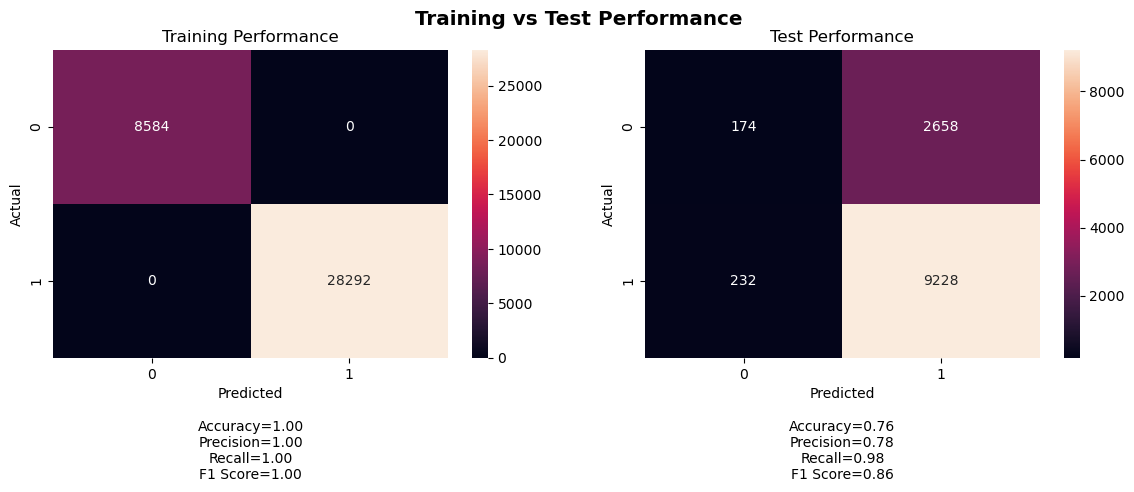

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
    
f, ax = plt.subplots(ncols=2, figsize=(14, 4))
f.suptitle('Training vs Test Performance', fontweight='bold', fontsize='x-large')

# Training set
y_test_pred = rf.predict(X_test)
y_train_pred = rf.predict(X_train)
cf_train = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cf_train, fmt='.0f', annot=True, ax=ax[0])
    
# Calculate metrics
accuracy_train = np.trace(cf_train) / float(np.sum(cf_train))
precision_train = cf_train[1,1] / sum(cf_train[:,1])
recall_train = cf_train[1,1] / sum(cf_train[1,:])
f1_score_train = 2 * precision_train * recall_train / (precision_train + recall_train)

stats_text_train = "\n\nAccuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nF1 Score={:0.2f}".format(
    accuracy_train, precision_train, recall_train, f1_score_train)

ax[0].set(xlabel='Predicted' + stats_text_train, 
          ylabel='Actual', title='Training Performance')

# Test set
cf_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cf_test, fmt='.0f', annot=True, ax=ax[1])

# Calculate metrics
accuracy_test = np.trace(cf_test) / float(np.sum(cf_test))
precision_test = cf_test[1,1] / sum(cf_test[:,1])
recall_test = cf_test[1,1] / sum(cf_test[1,:])
f1_score_test = 2 * precision_test * recall_test / (precision_test + recall_test)

stats_text_test = "\n\nAccuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nF1 Score={:0.2f}".format(
    accuracy_test, precision_test, recall_test, f1_score_test)

ax[1].set(xlabel='Predicted' + stats_text_test, 
          ylabel='Actual', title='Test Performance')

plt.show()

We then ranked our variables using the fitted Random Forest model:

In [5]:
# Get the feature importances
importances = rf.feature_importances_

# Get the feature names
feature_names = X_train.columns

# Create a list of tuples with (importance, feature name)
importance_features = sorted([(importance, feature) for feature, importance in zip(feature_names, importances)], key=lambda x: x[0], reverse=True)

# Print the feature rankings
for i, (importance, feature) in enumerate(importance_features):
    print(f"{i+1}. {feature} ({importance:.4f})")

1. Annual Income (0.1163)
2. Monthly Debt (0.1099)
3. Current Loan Amount (0.1094)
4. Maximum Open Credit (0.1073)
5. Current Credit Balance (0.1066)
6. Credit Score (0.1047)
7. Years of Credit History (0.1018)
8. Number of Open Accounts (0.0750)
9. Years in current job_10+ years (0.0125)
10. Purpose_Debt Consolidation (0.0095)
11. Years in current job_2 years (0.0084)
12. Years in current job_3 years (0.0079)
13. Term_Long Term (0.0079)
14. Years in current job_< 1 year (0.0076)
15. Years in current job_5 years (0.0074)
16. Years in current job_1 year (0.0071)
17. Purpose_Other (0.0070)
18. Years in current job_6 years (0.0068)
19. Years in current job_4 years (0.0068)
20. Term_Short Term (0.0067)
21. Years in current job_7 years (0.0064)
22. Years in current job_8 years (0.0064)
23. Home Ownership_Rent (0.0061)
24. Home Ownership_Home Mortgage (0.0058)
25. Years in current job_9 years (0.0056)
26. Purpose_Home Improvements (0.0049)
27. Home Ownership_Own Home (0.0048)
28. Number of C

### Hyperparameter tuning using Randomized Search
Optimizing parameters to improve machine learning accuracy, then training and testing our data based on the optimized parameters:

In [6]:
from sklearn.model_selection import RandomizedSearchCV

# do Hyperparameter tuning using randomized search

params = {'max_depth': [2,3,5,10,15,20],
          'min_samples_leaf': [5,10,20],
          'n_estimators': [10,25,30],
}

# Initialize RandomizedSearchCV over random forest model for the defined parameters
random_search = RandomizedSearchCV(estimator=rf,param_distributions=params,cv=4,n_jobs=-1,verbose=1,scoring="accuracy")

# Random search selects random combinations of hyperparameters to train the model
# shorter time to compute but may not find as accurate of a result as grid search
random_search.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4,
                   estimator=RandomForestClassifier(bootstrap=False, n_jobs=-1,
                                                    random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 5, 10, 15, 20],
                                        'min_samples_leaf': [5, 10, 20],
                                        'n_estimators': [10, 25, 30]},
                   scoring='accuracy', verbose=1)

In [7]:
# find the best estimator for randomized search
print(random_search.best_estimator_)

RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_leaf=10,
                       n_estimators=25, n_jobs=-1, random_state=42)


Plotting and visualising Random Forest Tree based on optimized parameters:

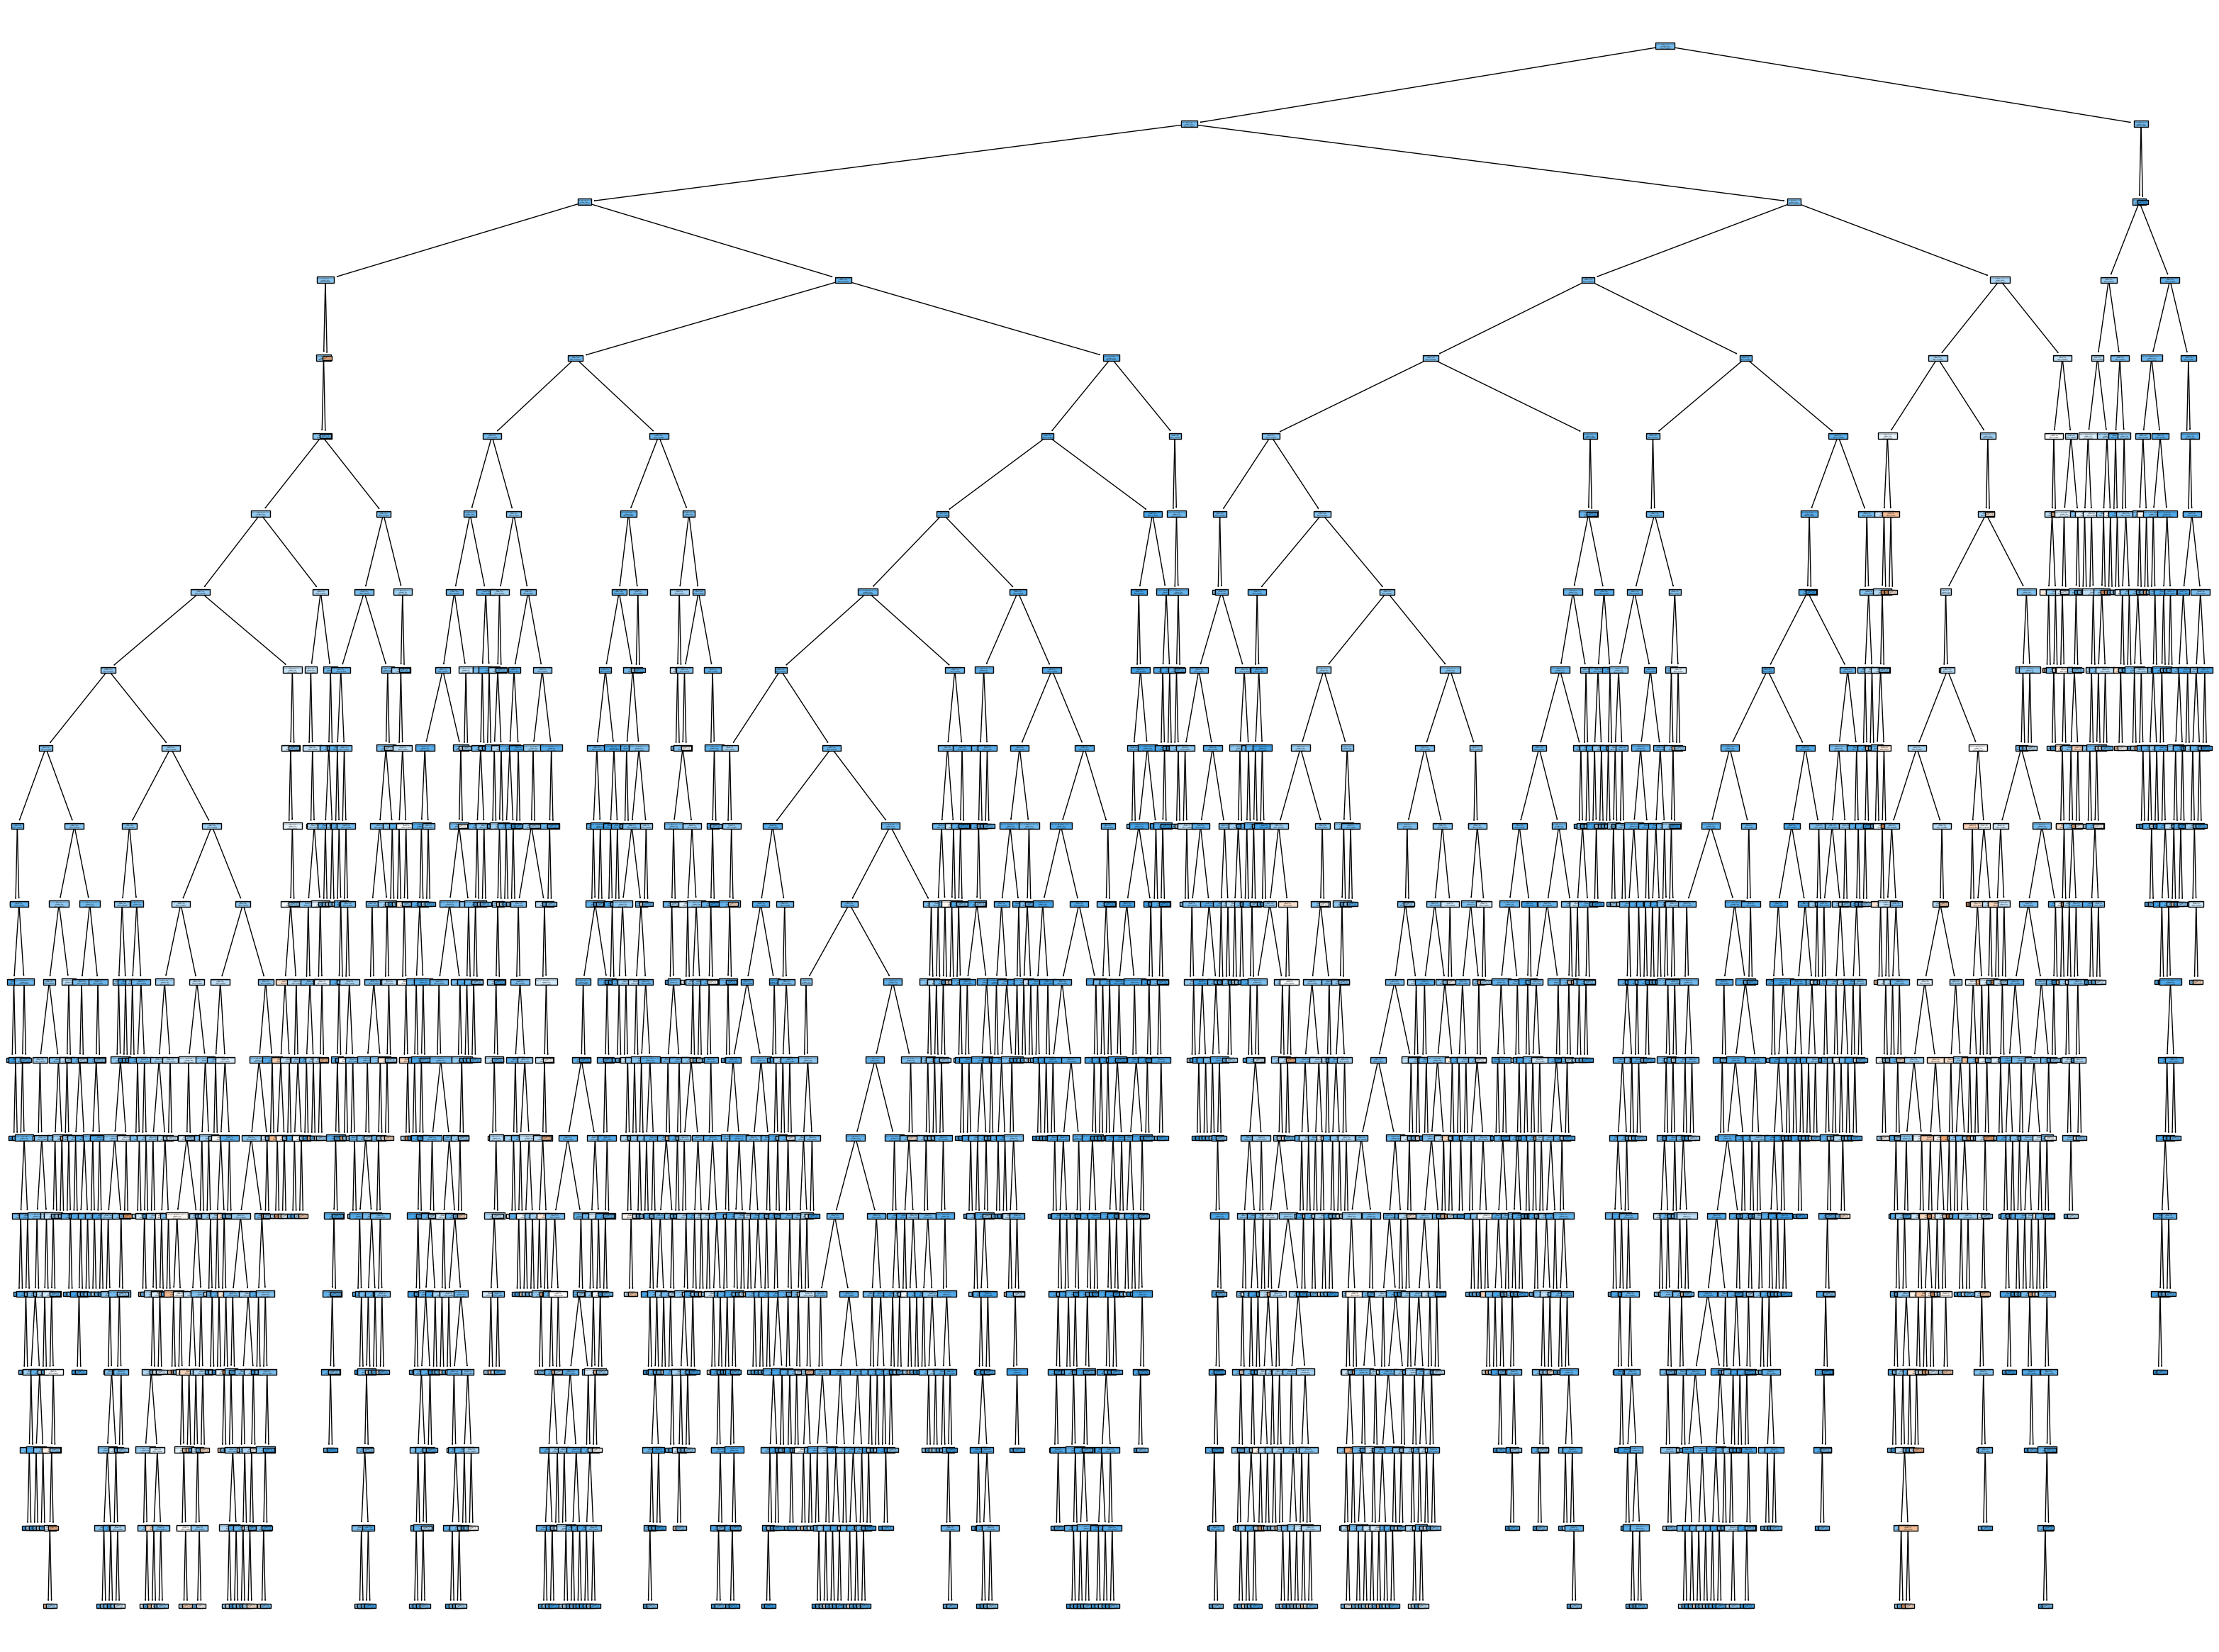

In [9]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

randomized_best = random_search.best_estimator_

plt.figure(figsize=(40,30))

# Convert feature names to a list
feature_names = list(predics.columns)  # Or use predics.columns.tolist()

plot_tree(randomized_best.estimators_[2],
          feature_names=feature_names,
          class_names=['Fully Paid', 'Charged Off'],
          filled=True)

plt.show()  # Display the plot

Checking accuracy metrics for optimized parameters model:

In [10]:
# use the randomized search model and the test set of predictors to predict the response 
y_pred = randomized_best.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class problems
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class problems
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class problems

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print()
print(classification_report(y_test, y_pred))

Accuracy: 0.7691181256101529
F1 Score: 0.6755449294477475
Precision: 0.7013532493594337
Recall: 0.7691181256101529

              precision    recall  f1-score   support

           0       0.47      0.02      0.03      2832
           1       0.77      0.99      0.87      9460

    accuracy                           0.77     12292
   macro avg       0.62      0.51      0.45     12292
weighted avg       0.70      0.77      0.68     12292



We realised that there has been an improvement in accuracy (weightage average increases, deviation between train and test decreases) after optimizing our parameters, which is ideal and so we will be using the model with optimized parameters for our final ranking for Random Forest.

Comparing training and test performances' accuracy metrics using a confusion matrix:

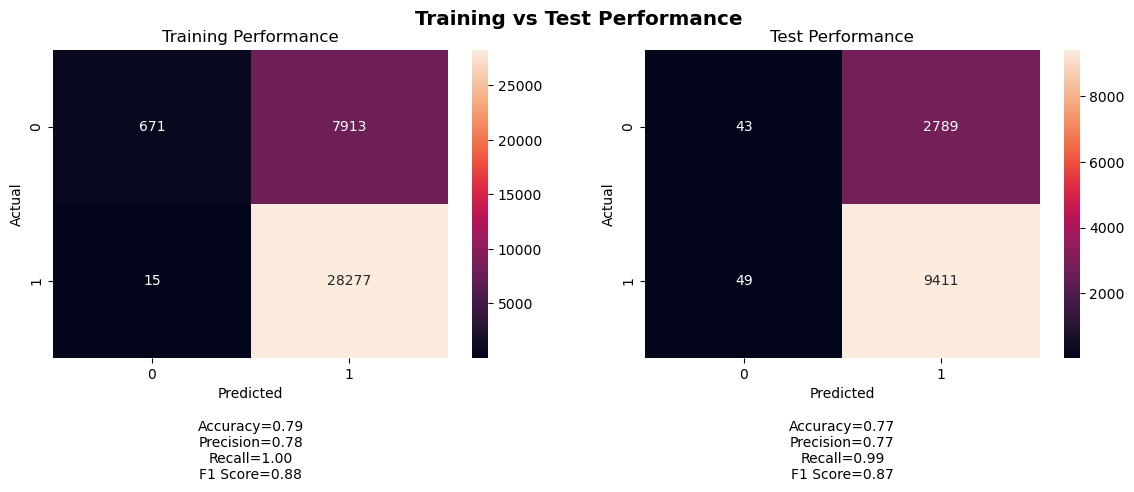

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
    
f, ax = plt.subplots(ncols=2, figsize=(14, 4))
f.suptitle('Training vs Test Performance', fontweight='bold', fontsize='x-large')

# Training set
y_test_pred = randomized_best.predict(X_test)
y_train_pred = randomized_best.predict(X_train)
cf_train = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cf_train, fmt='.0f', annot=True, ax=ax[0])
    
# Calculate metrics
accuracy_train = np.trace(cf_train) / float(np.sum(cf_train))
precision_train = cf_train[1,1] / sum(cf_train[:,1])
recall_train = cf_train[1,1] / sum(cf_train[1,:])
f1_score_train = 2 * precision_train * recall_train / (precision_train + recall_train)

stats_text_train = "\n\nAccuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nF1 Score={:0.2f}".format(
    accuracy_train, precision_train, recall_train, f1_score_train)

ax[0].set(xlabel='Predicted' + stats_text_train, 
          ylabel='Actual', title='Training Performance')

# Test set
cf_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cf_test, fmt='.0f', annot=True, ax=ax[1])

# Calculate metrics
accuracy_test = np.trace(cf_test) / float(np.sum(cf_test))
precision_test = cf_test[1,1] / sum(cf_test[:,1])
recall_test = cf_test[1,1] / sum(cf_test[1,:])
f1_score_test = 2 * precision_test * recall_test / (precision_test + recall_test)

stats_text_test = "\n\nAccuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nF1 Score={:0.2f}".format(
    accuracy_test, precision_test, recall_test, f1_score_test)

ax[1].set(xlabel='Predicted' + stats_text_test, 
          ylabel='Actual', title='Test Performance')

plt.show()

Ranking of predictors of Loan Status using model with optimized parameters:

In [12]:
importances = randomized_best.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature rankings
print("Ranking of variables that determine the loan status:")
for f in range(X_train.shape[1]):
    print(f"{f+1}. {X_train.columns[indices[f]]} ({importances[indices[f]]:.4f})")

Ranking of variables that determine the loan status:
1. Credit Score (0.1570)
2. Annual Income (0.1392)
3. Current Loan Amount (0.1051)
4. Monthly Debt (0.0993)
5. Maximum Open Credit (0.0914)
6. Current Credit Balance (0.0884)
7. Years of Credit History (0.0842)
8. Number of Open Accounts (0.0514)
9. Term_Long Term (0.0436)
10. Term_Short Term (0.0309)
11. Home Ownership_Rent (0.0125)
12. Home Ownership_Home Mortgage (0.0111)
13. Years in current job_10+ years (0.0098)
14. Purpose_Debt Consolidation (0.0081)
15. Purpose_Other (0.0046)
16. Years in current job_2 years (0.0045)
17. Years in current job_3 years (0.0044)
18. Years in current job_< 1 year (0.0040)
19. Years in current job_6 years (0.0038)
20. Home Ownership_Own Home (0.0037)
21. Number of Credit Problems_0 (0.0036)
22. Years in current job_5 years (0.0035)
23. Years in current job_4 years (0.0034)
24. Bankruptcies_0 (0.0033)
25. Number of Credit Problems_>= 1 (0.0033)
26. Years in current job_1 year (0.0030)
27. Years in c